In [1]:
import cv2
import numpy as np
from utils import show_images

src = cv2.imread('./image/pedestrian.jpg')

Box at (x,y)=(318,206); score=0.793407
Box at (x,y)=(425,206); score=0.743763
Box at (x,y)=(200,204); score=0.736198
Box at (x,y)=(285,207); score=0.698457
Box at (x,y)=(286,207); score=0.689924
Box at (x,y)=(180,204); score=0.681813
Box at (x,y)=(113,196); score=0.670993
Box at (x,y)=(417,205); score=0.663301
Box at (x,y)=(373,204); score=0.657234
Box at (x,y)=(425,262); score=0.633975
Box at (x,y)=(271,168); score=0.626164
Box at (x,y)=(149,1); score=0.604888
Box at (x,y)=(86,204); score=0.604068
Box at (x,y)=(196,76); score=0.591194
Box at (x,y)=(112,1); score=0.588970
Box at (x,y)=(328,206); score=0.585175
Box at (x,y)=(180,200); score=0.581057
Box at (x,y)=(1,1); score=0.571114
Box at (x,y)=(424,253); score=0.570604
Box at (x,y)=(153,1); score=0.570560
Box at (x,y)=(285,61); score=0.567316
Box at (x,y)=(219,204); score=0.565880
Box at (x,y)=(179,113); score=0.563043
Box at (x,y)=(377,1); score=0.553036
Box at (x,y)=(423,219); score=0.549134
Box at (x,y)=(348,229); score=0.548768
B

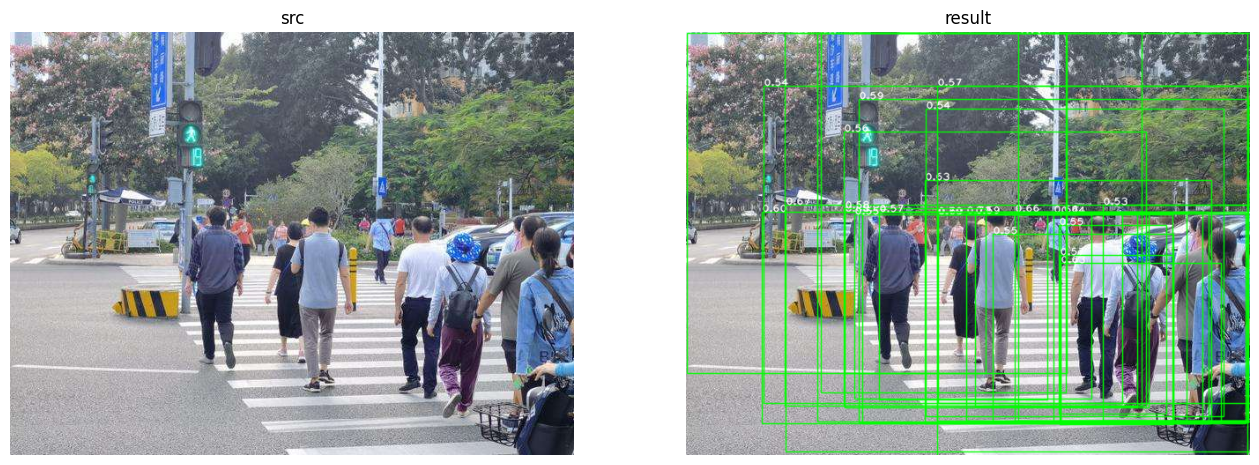

In [2]:
edge_boxes = cv2.ximgproc.createEdgeBoxes()
edge_boxes.setMaxBoxes(30)

# 边缘检测，原论文中用到就是这个 StructureEdgeDetection
# https://github.com/fengzhenHIT/OpenCV-contrib-module-Chinese-Tutorials/blob/master/chapter%2020/%E8%AE%AD%E7%BB%83%E7%BB%93%E6%9E%84%E5%8C%96%E6%A3%AE%E6%9E%97.md
model_pth = './image/edge/StructuredEdgeDetection.yml'
pDollar = cv2.ximgproc.createStructuredEdgeDetection(model_pth)
# 检测边缘的图片要求：RGB、0-1
nowimg = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
edges = pDollar.detectEdges(np.float32(nowimg) / 255.0)
orimap = pDollar.computeOrientation(edges)

boxes = edge_boxes.getBoundingBoxes(edges, orimap)
boxes, scores = edge_boxes.getBoundingBoxes(edges, orimap)

show_frame = np.copy(src)
if len(boxes) > 0:
    boxes_scores = zip(boxes, scores)
    for b_s in boxes_scores:
        box = b_s[0]
        x, y, w, h = box
        cv2.rectangle(show_frame, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        score = b_s[1][0]
        cv2.putText(show_frame, "{:.2f}".format(score), (x, y), cv2.FONT_HERSHEY_PLAIN, 0.8, (255, 255, 255), 1, cv2.LINE_AA)
        print("Box at (x,y)=({:d},{:d}); score={:f}".format(x, y, score))

show_images([ ('src', src), ('result', show_frame) ])

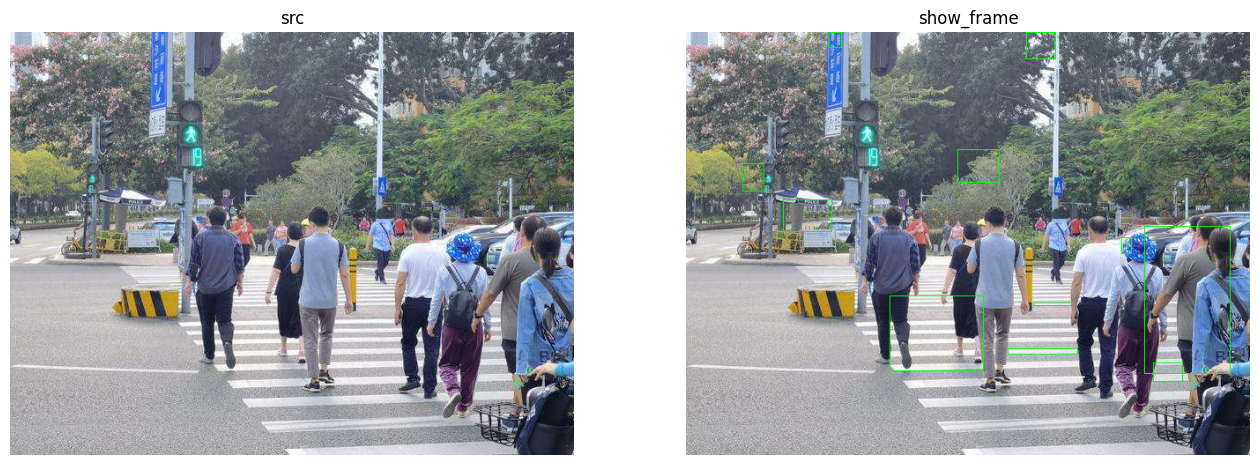

In [3]:
'''
class  	cv::ximgproc::segmentation::SelectiveSearchSegmentation
class  	cv::ximgproc::segmentation::SelectiveSearchSegmentationStrategy
    class  	cv::ximgproc::segmentation::SelectiveSearchSegmentationStrategyColor
    class  	cv::ximgproc::segmentation::SelectiveSearchSegmentationStrategyFill
    class  	cv::ximgproc::segmentation::SelectiveSearchSegmentationStrategyMultiple
    class  	cv::ximgproc::segmentation::SelectiveSearchSegmentationStrategySize
    class  	cv::ximgproc::segmentation::SelectiveSearchSegmentationStrategyTexture
'''

gs = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
gs.setBaseImage(src)

gs.switchToSelectiveSearchFast()
# gs.switchToSelectiveSearchQuality()
# gs.switchToSingleStrategy()

rects = gs.process()

show_frame = np.copy(src)
for idx, rect in enumerate(rects):
    if idx > 10:
        break
    x, y, w, h = rect
    cv2.rectangle(show_frame, (x, y), (x+w, y+h), (0, 255, 0), 1)

show_images([
    ('src', src),
    ('show_frame', show_frame)
])